# Pulsar Emission Data Analysis

In [61]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats
import statistics
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

#### Section for extracting from a tar file. ####

##### Currently implemented for original TAR File structure.

In [62]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [63]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar6 = pd.read_csv("Data/J1456-6843.pulses", sep = ' ', header = None, names = colnames)

In [64]:
pulsar6.shape

(1219, 3)

In [65]:
pulsar6.head(25)

,Pulse Number,Brightness,Uncertainty
0,1,0.053904,0.005560
1,2,0.058653,0.004821
2,3,0.110208,0.005196
3,4,0.034716,0.004729
4,5,0.056101,0.004619
5,6,0.046168,0.005074
6,7,0.055648,0.004916
7,8,0.060890,0.004581
8,9,0.024388,0.004922
9,10,0.039370,0.004633


In [66]:
pulsar6.describe()

,Pulse Number,Brightness,Uncertainty
count,1219.000000,1219.000000,1219.000000
mean,610.000000,0.104176,0.005410
std,352.039297,0.081916,0.001282
min,1.000000,-0.007285,0.001075
25%,305.500000,0.045763,0.004728
50%,610.000000,0.081228,0.004966
75%,914.500000,0.144228,0.005541
max,1219.000000,0.825366,0.016201


In [67]:
pulsar6["Brightness"].describe()

count    1219.000000
mean        0.104176
std         0.081916
min        -0.007285
25%         0.045763
50%         0.081228
75%         0.144228
max         0.825366
Name: Brightness, dtype: float64

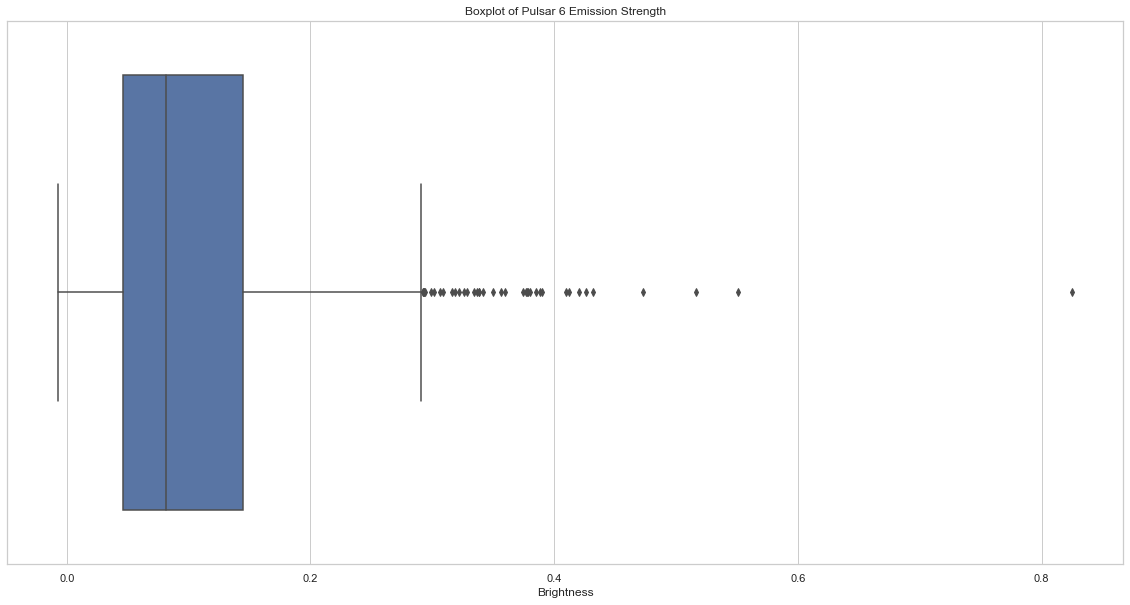

In [68]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

In [69]:
#numpy method of outlier removal

pulsar6npcleaned = pulsar6[(np.abs(stats.zscore(pulsar6["Brightness"])) <3)]
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty
0,1,5.390386e-02,0.005560
1,2,5.865279e-02,0.004821
2,3,1.102083e-01,0.005196
3,4,3.471609e-02,0.004729
4,5,5.610133e-02,0.004619
...,...,...,...
1214,1215,4.321559e-02,0.004991
1215,1216,1.830750e-02,0.004578
1216,1217,1.155671e-01,0.005212
1217,1218,1.562609e-02,0.004686


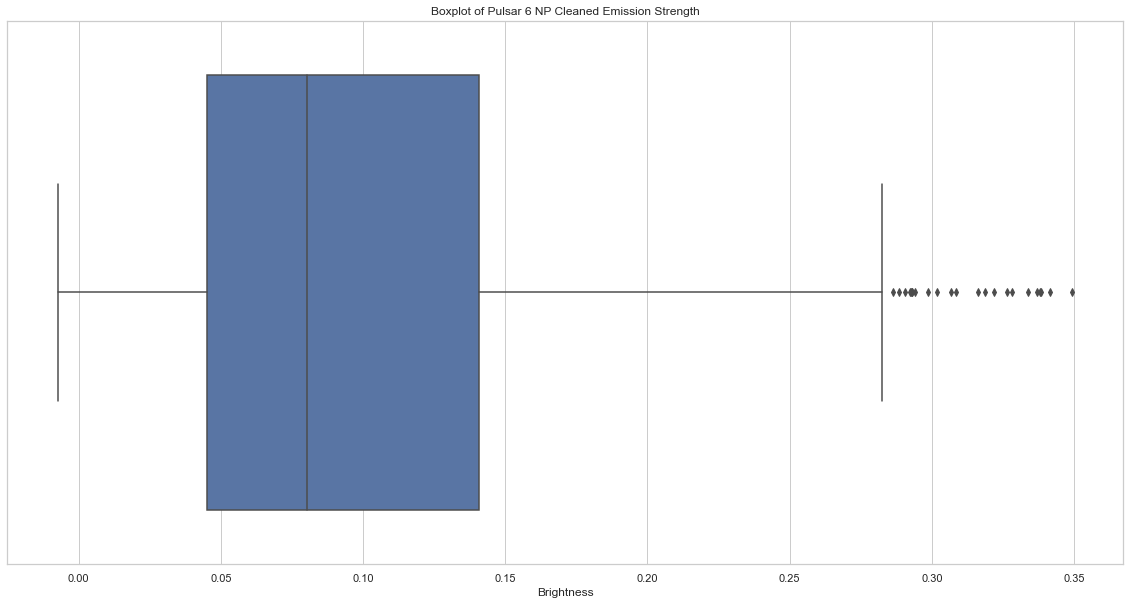

In [70]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6npcleaned["Brightness"]).set_title("Boxplot of Pulsar 6 NP Cleaned Emission Strength")

In [71]:
pulsar6npcleaned["Brightness"].describe()

count    1200.000000
mean        0.098966
std         0.069984
min        -0.007285
25%         0.045148
50%         0.080303
75%         0.140589
max         0.349419
Name: Brightness, dtype: float64

In [72]:
pulsar6npcleaned["Brightness"].median()

0.08030321

In [73]:
medianpulse6 = pulsar6["Brightness"].median()
print("Median of Pulsar6: ", medianpulse6)
pulsar6['Binary'] = np.where(pulsar6['Brightness'] > medianpulse6, 1, 0)

Median of Pulsar6:  0.081228


In [74]:
pulsar6

,Pulse Number,Brightness,Uncertainty,Binary
0,1,5.390386e-02,0.005560,0
1,2,5.865279e-02,0.004821,0
2,3,1.102083e-01,0.005196,1
3,4,3.471609e-02,0.004729,0
4,5,5.610133e-02,0.004619,0
...,...,...,...,...
1214,1215,4.321559e-02,0.004991,0
1215,1216,1.830750e-02,0.004578,0
1216,1217,1.155671e-01,0.005212,1
1217,1218,1.562609e-02,0.004686,0


In [75]:
median = pulsar6npcleaned["Brightness"].median()
print("Median of Pulsar6 np cleaned: ", median)
pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)

Median of Pulsar6 np cleaned:  0.08030321


C:\Users\oxlay\AppData\Local\Temp/ipykernel_11344/1919336679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)


In [76]:
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty,Binary
0,1,5.390386e-02,0.005560,0
1,2,5.865279e-02,0.004821,0
2,3,1.102083e-01,0.005196,1
3,4,3.471609e-02,0.004729,0
4,5,5.610133e-02,0.004619,0
...,...,...,...,...
1214,1215,4.321559e-02,0.004991,0
1215,1216,1.830750e-02,0.004578,0
1216,1217,1.155671e-01,0.005212,1
1217,1218,1.562609e-02,0.004686,0


c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


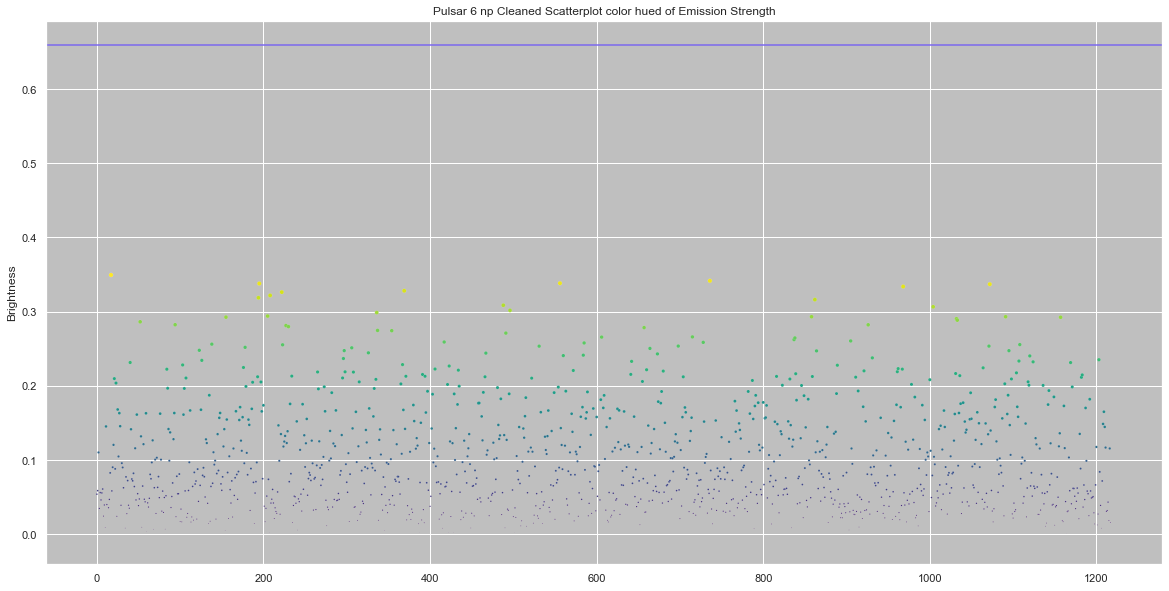

In [77]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.scatterplot(data=pulsar6npcleaned["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6589028, ls='-',c='mediumslateblue')

In [78]:
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness > 0.6589028)]))
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness < 0.6589028)]))

0
1200


c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


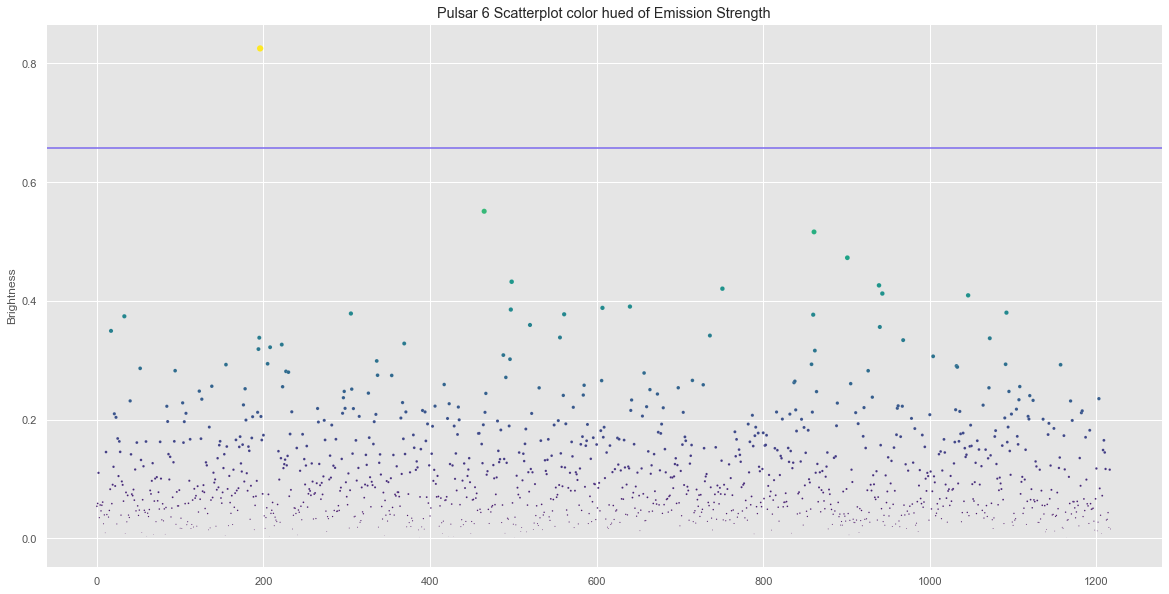

In [79]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')

In [80]:
print(len(pulsar6[(pulsar6.Brightness > 0.6589028)]))
print(len(pulsar6[(pulsar6.Brightness < 0.6589028)]))

1
1218


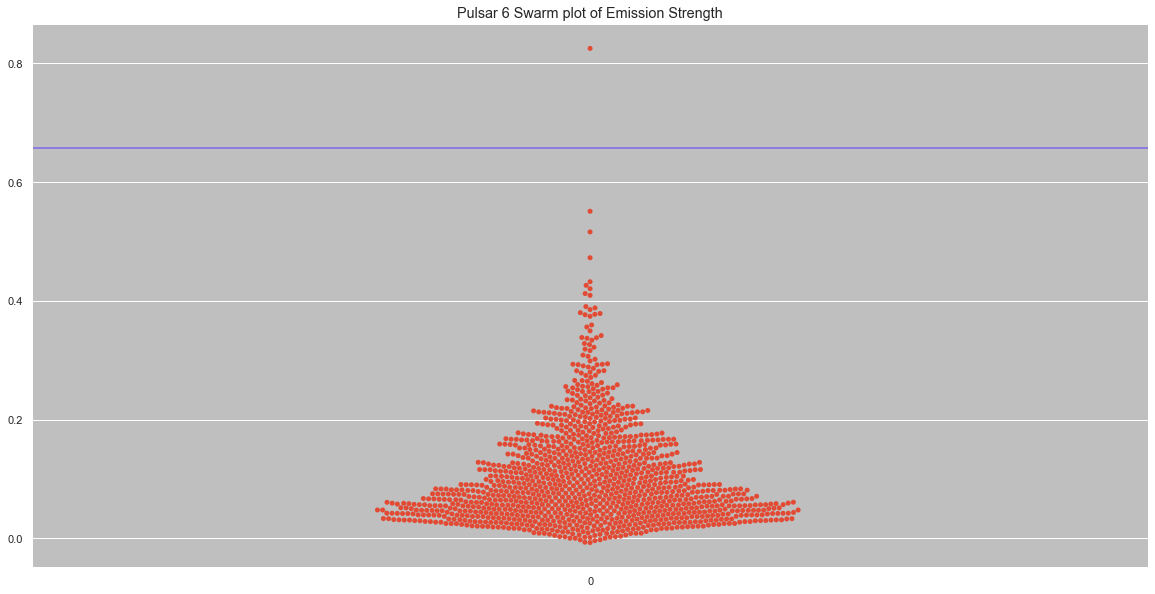

In [81]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=pulsar6["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')


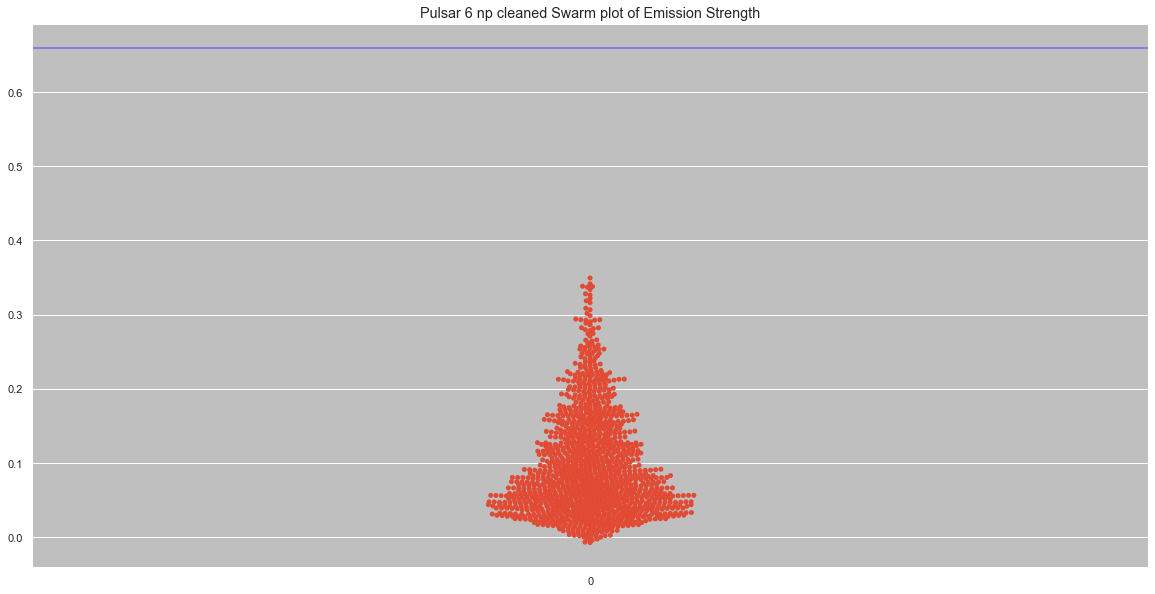

In [82]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.swarmplot(data=pulsar6npcleaned["Brightness"]).set_title('Pulsar 6 np cleaned Swarm plot of Emission Strength')
ax = plt.axhline( y=0.6589028, ls='-', c='mediumslateblue')

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 Brightness')

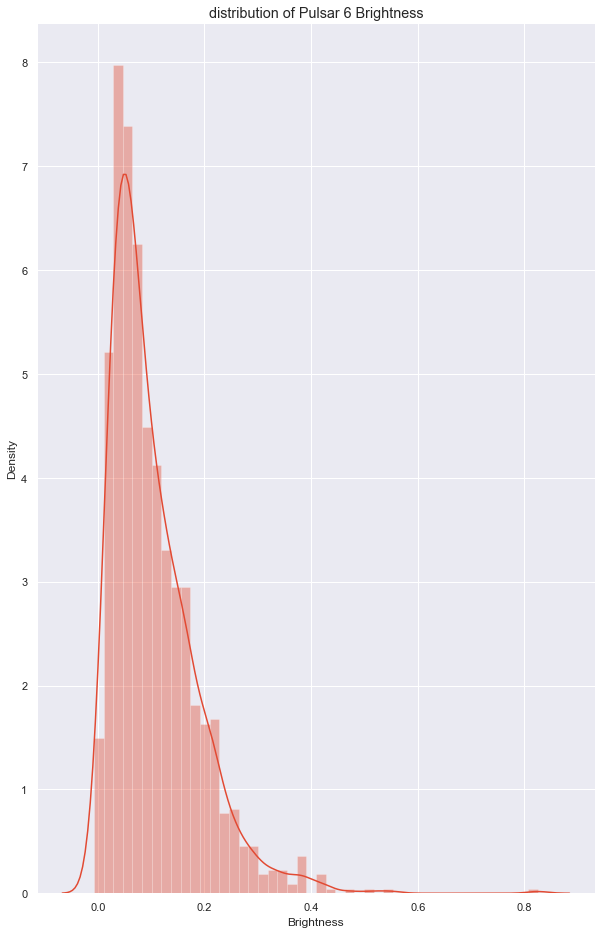

In [83]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Brightness)
plt.title("distribution of Pulsar 6 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned Brightness')

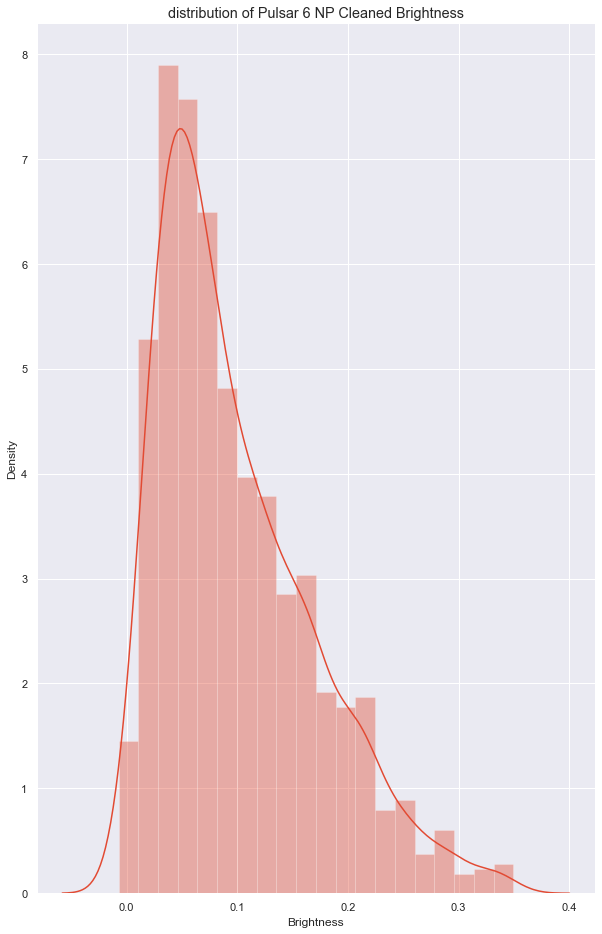

In [84]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Brightness)
plt.title("distribution of Pulsar 6 NP Cleaned Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned binary assignments')

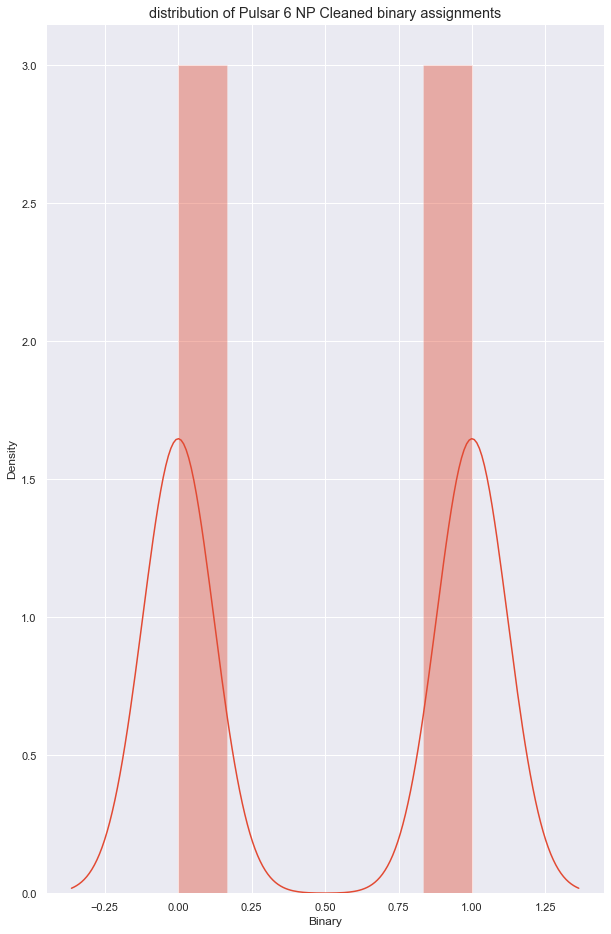

In [85]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Binary)
plt.title("distribution of Pulsar 6 NP Cleaned binary assignments")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 binary assignments')

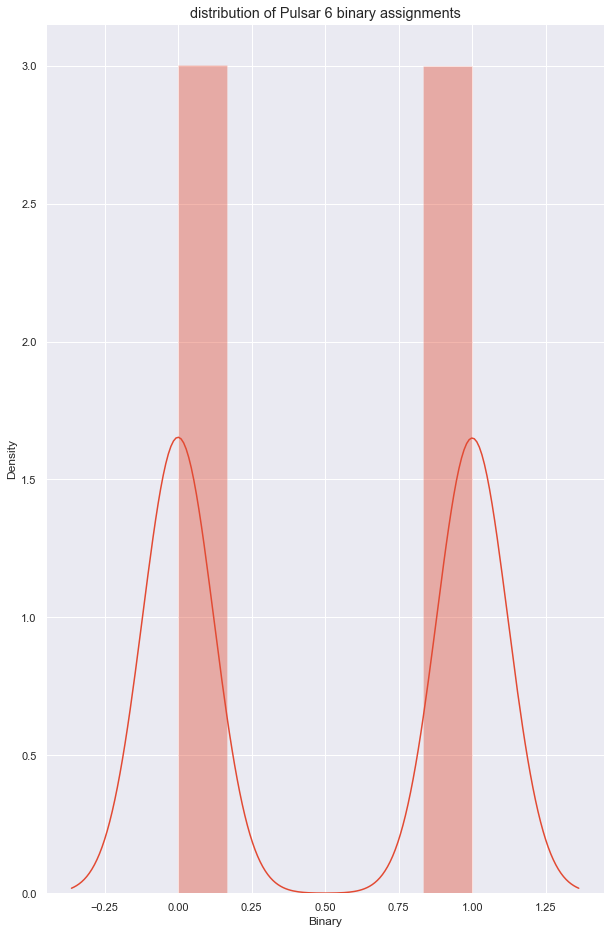

In [86]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Binary)
plt.title("distribution of Pulsar 6 binary assignments")

# Preliminary runs test
### Math Logic

$$ Z = {R - \tilde{R} \over s_{R}} $$

$$ \tilde{R} = {2_{n1 n2} \over n1 + n2} + 1 $$

$$  s^2_{R} = {2_{n1n2}(2{n1n2-n1-n2}) \over (n1+n2)^2(n1+n2-1) }$$

link to resource: https://www.geeksforgeeks.org/runs-test-of-randomness-in-python/

$ Z_{critical} = 1.96 $ as the confidence interval level of 95% thus this is a 2 tailed test. If the probability as corrosponding to this confidence interval $ H_{null} $ will be rejected as it is not statistically significant as denoted by $|Z| > Z_{critical} $

There is also code attempting to change it from a z-score probability to a P-score for ease of understanding and clarity.

# FUNCTION CODE FOR RUNS TEST

In [87]:
# MUST BE PASSED A LIST AND A INT/FLOAT 


def runsTest(data, dataMedian):
    runs = 0
    above = 0
    below = 0

    for i in range(len(data)):
        if(data[i] >= dataMedian and data[i-1] < dataMedian) or (data[i] < dataMedian and data[i-1] >= dataMedian):
            runs += 1
        
        if(data[i] >= dataMedian):
            above += 1
        
        else:
            below += 1
    
    R = ((2*above*below)/(above+below))+1
    #sdevTemp = (2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1))
    #sdevTemp = (2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)*2)*(n1+n2-1))
    Sdev = math.sqrt((2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1)))   

    float(Sdev)
    float(R)
    float(runs)
    z = (runs-R)/Sdev
    return z     

In [88]:
binaryData1 = pulsar6['Binary'].tolist()
print("pulsar6 original: ",binaryData1)

binaryData1nooutlier = pulsar6npcleaned['Binary'].tolist()
print("\n pulsar6 original: ", binaryData1nooutlier)

pulsar6 original:  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,

In [89]:
print("Brightness Median Test")
Zscore = abs(runsTest(binaryData1, medianpulse6))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

#print("Binary Median Test")
#binarymedian1 = pulsar6["Binary"].median()

#Zscore = abs(runsTest(binaryData1, binarymedian1))
#Pval = stats.norm.sf(abs(Zscore))*2
#print('Z Statistic is: ', Zscore)
#print('P Value is : ', Pval)

#if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

#if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')


print("Removed outliers from dataset")
Zscore = abs(runsTest(binaryData1nooutlier, median))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

Brightness Median Test
Z Statistic is:  4.383953075765998
P Value is :  1.1654488744979022e-05
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.
Removed outliers from dataset
Z Statistic is:  4.216415636959298
P Value is :  2.4821608494399123e-05
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.


# Analysis of the preliminary data analysis

We can see here through our printouts the value of both Z Statistic based on the above Runs Test of Randomness and the approximate correlative P-value.

If the conditional prints are not activated it meants there is no statistical significance to reject the $H_{null}$

$ H_{null} $ is where the numbers are randomly generated and sequenced
-
$ H_{alt} $ is where the numbers are not randomly generated or sequenced
-


Further testing can be done with more variety of datasets with pythonic libraries and R librariest such as NIST and Rrandtest (placeholders cant remember their names)


# Below we begin autocorrelation and autocovariance analysis

To get started with this I am playing around with guide from: https://towardsdatascience.com/a-step-by-step-guide-to-calculating-autocorrelation-and-partial-autocorrelation-8c4342b784e8

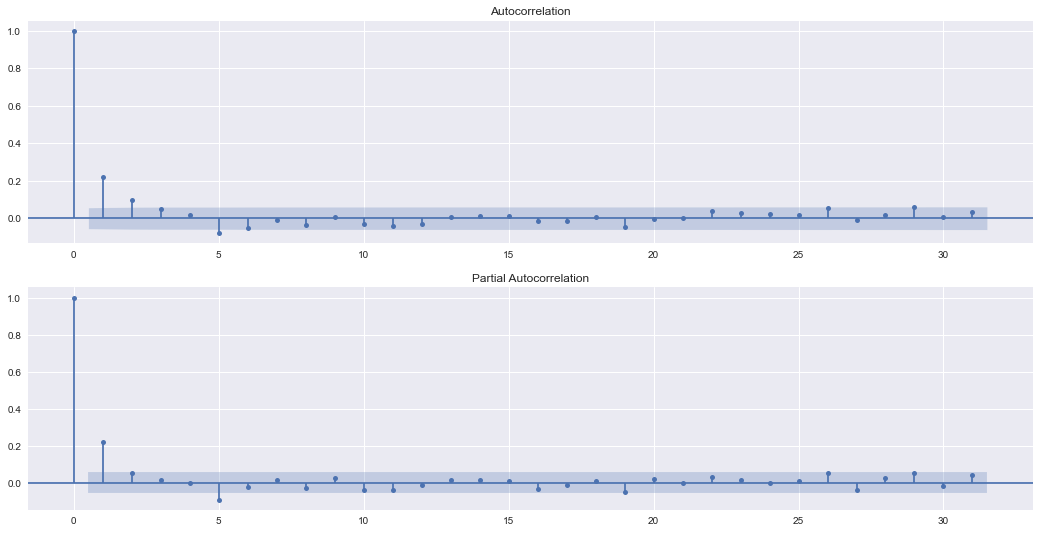

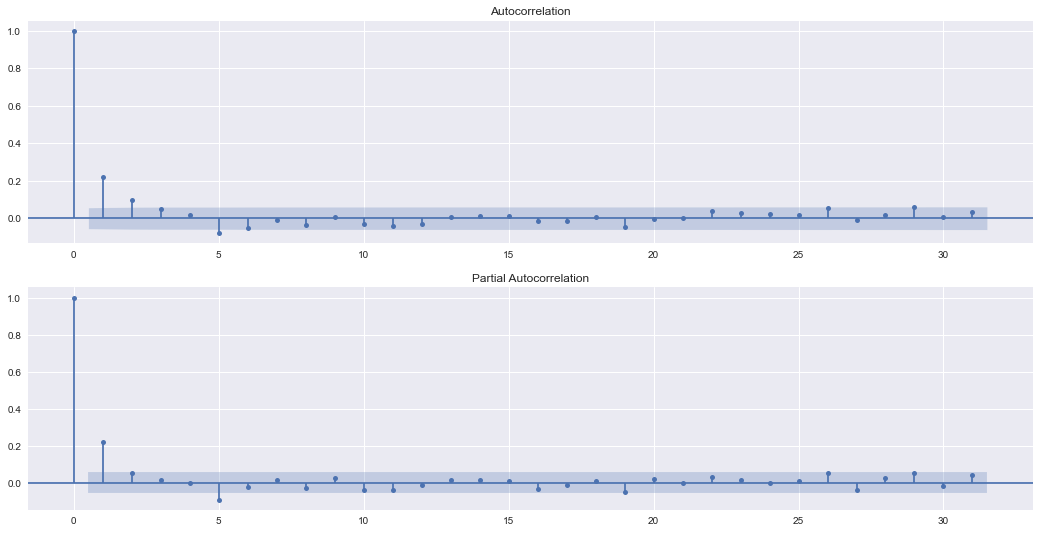

In [90]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar6['Brightness'], ax=ax[0])
plot_pacf(pulsar6['Brightness'], ax=ax[1], method="ols")

In [91]:
acf(pulsar6['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.22161581,  0.09940415,  0.04669096,  0.01876941,
       -0.07818365, -0.0539178 , -0.01220963, -0.03566829,  0.00520742,
       -0.03014362])

In [92]:
acfpulsar6 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar6[f"B_lag_{lag}"] = pulsar6['Brightness'].shift(lag)


acfpulsar6

,B_lag_0,B_lag_1,B_lag_2,B_lag_3,B_lag_4,B_lag_5,B_lag_6,B_lag_7,B_lag_8,B_lag_9,B_lag_10
0,5.390386e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.865279e-02,0.053904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.102083e-01,0.058653,0.053904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.471609e-02,0.110208,0.058653,0.053904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.610133e-02,0.034716,0.110208,0.058653,0.053904,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1214,4.321559e-02,0.031916,0.030713,0.116777,0.144606,0.165039,0.148642,0.071752,0.008108,0.038793,0.084002
1215,1.830750e-02,0.043216,0.031916,0.030713,0.116777,0.144606,0.165039,0.148642,0.071752,0.008108,0.038793
1216,1.155671e-01,0.018308,0.043216,0.031916,0.030713,0.116777,0.144606,0.165039,0.148642,0.071752,0.008108
1217,1.562609e-02,0.115567,0.018308,0.043216,0.031916,0.030713,0.116777,0.144606,0.165039,0.148642,0.071752


In [93]:
acfpulsar6.corr()["B_lag_0"].values

array([ 1.        ,  0.22179701,  0.09954441,  0.04675654,  0.01880625,
       -0.07839106, -0.05409556, -0.01226841, -0.03581717,  0.00521062,
       -0.03030331])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [94]:
held5ths = pulsar6[pulsar6.index % 5 == 0]
held5ths

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.053904,0.005560,0
5,6,0.046168,0.005074,0
10,11,0.009141,0.004581,0
15,16,0.046869,0.004706,0
20,21,0.120429,0.005141,1
...,...,...,...,...
1195,1196,0.049626,0.004631,0
1200,1201,0.117575,0.005117,1
1205,1206,0.038793,0.004621,0
1210,1211,0.144606,0.005046,1


In [95]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.08254402

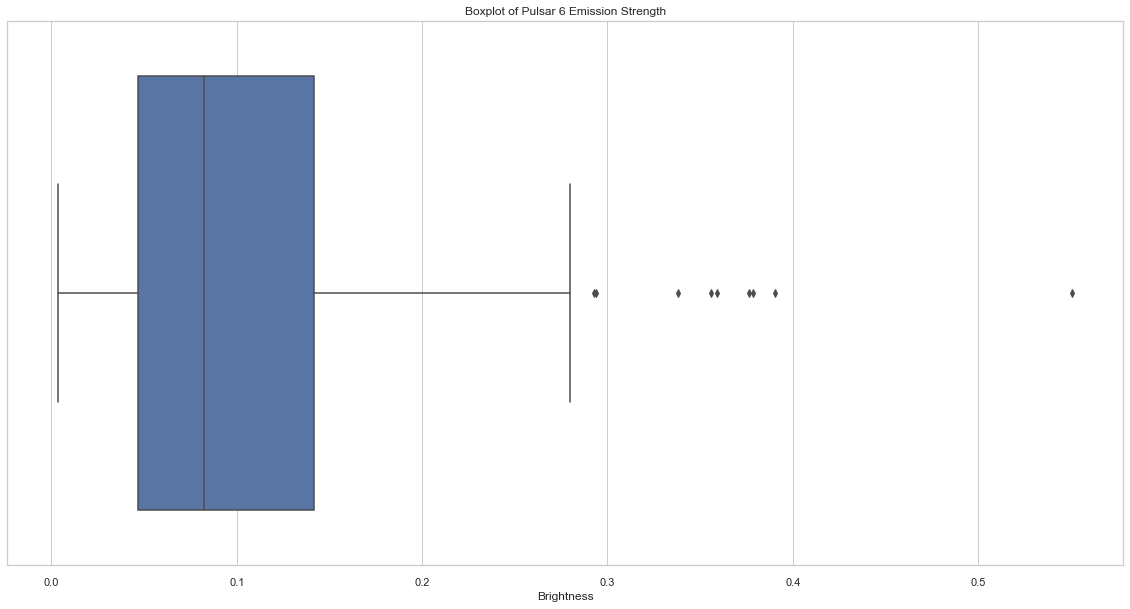

In [96]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

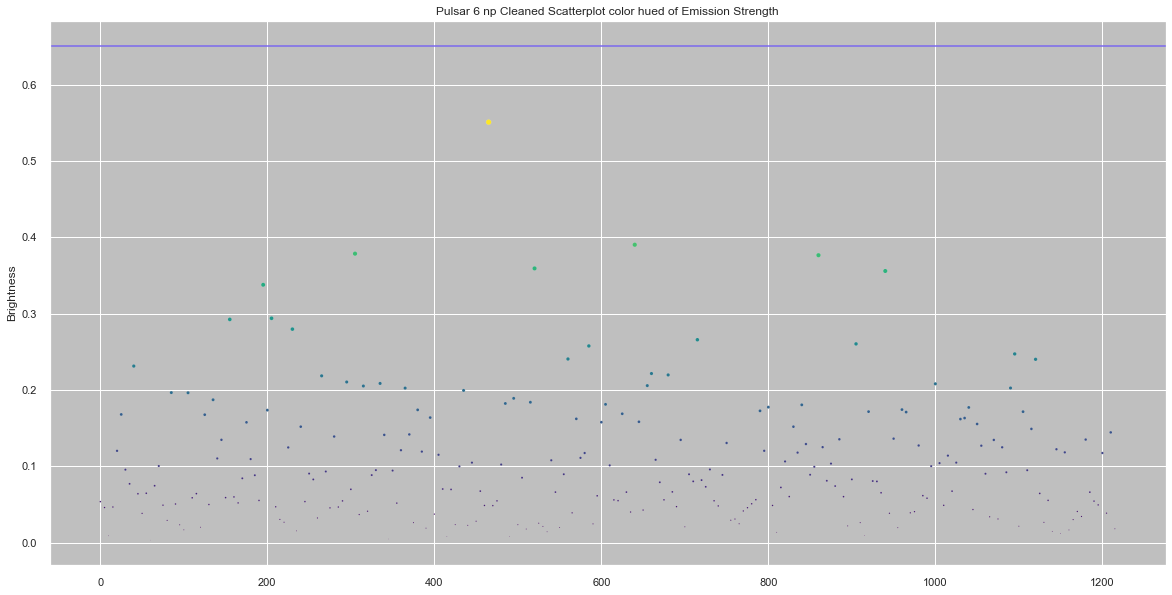

In [97]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')

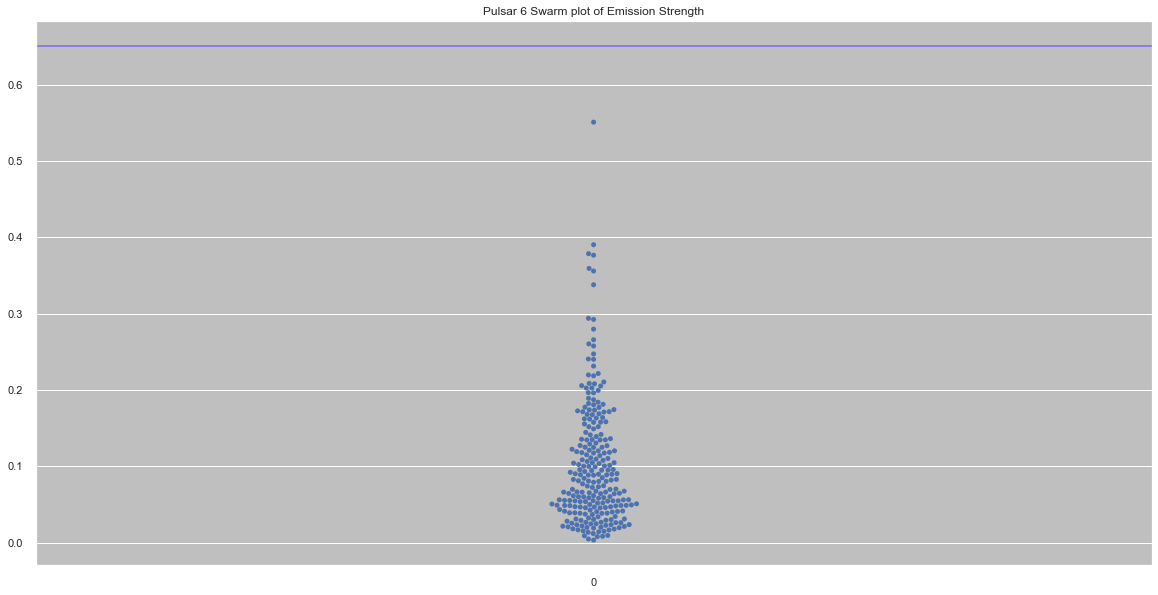

In [98]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [99]:
print(len(held5ths[(held5ths.Brightness > 0.6508051)]))
print(len(held5ths[(held5ths.Brightness < 0.6508051)]))

0
244


#### isolating every 100 rows into discrete sets.

In [100]:
size = 100
N = int(len(pulsar6)/size)
pulsarsubframes = [pulsar6.iloc[i*size:(i+1)*size].copy() for i in range(N+1)]
#pulsarsubframes[-1]

frame1 = pulsarsubframes[0]
frame2 = pulsarsubframes[1]
frame3 = pulsarsubframes[2]
frame4 = pulsarsubframes[3]
frame5 = pulsarsubframes[4]
frame6 = pulsarsubframes[5]
frame7 = pulsarsubframes[6]

medianframe1 = frame1["Brightness"].median()
print("Median of Pulsar6: ", medianframe1)
frame1['Binary'] = np.where(frame1['Brightness'] > 0.6589028, 1, 0)

medianframe2 = frame2["Brightness"].median()
print("Median of Pulsar6: ", medianframe2)
frame2['Binary'] = np.where(frame2['Brightness'] > 0.6589028, 1, 0)

medianframe3 = frame3["Brightness"].median()
print("Median of Pulsar6: ", medianframe3)
frame3['Binary'] = np.where(frame3['Brightness'] > 0.6589028, 1, 0)

medianframe4 = frame4["Brightness"].median()
print("Median of Pulsar6: ", medianframe4)
frame4['Binary'] = np.where(frame4['Brightness'] > 0.6589028, 1, 0)

medianframe5 = frame5["Brightness"].median()
print("Median of Pulsar6: ", medianframe5)
frame5['Binary'] = np.where(frame5['Brightness'] > 0.6589028, 1, 0)

medianframe6 = frame6["Brightness"].median()
print("Median of Pulsar6: ", medianframe6)
frame6['Binary'] = np.where(frame6['Brightness'] > 0.6589028, 1, 0)

medianframe7 = frame7["Brightness"].median()
print("Median of Pulsar6: ", medianframe7)
frame7['Binary'] = np.where(frame7['Brightness'] > 0.6589028, 1, 0)

Median of Pulsar6:  0.064550265
Median of Pulsar6:  0.086795765
Median of Pulsar6:  0.08227514999999999
Median of Pulsar6:  0.08913211500000001
Median of Pulsar6:  0.08877739000000001
Median of Pulsar6:  0.08870457
Median of Pulsar6:  0.088843145


In [101]:
framebinary = []

In [102]:
print(frame1)

storeover1 = len(frame1[(frame1.Brightness > frame1["Brightness"].median())])
storeunder1 = len(frame1[(frame1.Brightness < frame1["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

    Pulse Number  Brightness  Uncertainty  Binary
0              1    0.053904     0.005560       0
1              2    0.058653     0.004821       0
2              3    0.110208     0.005196       0
3              4    0.034716     0.004729       0
4              5    0.056101     0.004619       0
..           ...         ...          ...     ...
95            96    0.023561     0.004527       0
96            97    0.078075     0.004923       0
97            98    0.054539     0.004686       0
98            99    0.054558     0.005202       0
99           100    0.081105     0.004697       0

[100 rows x 4 columns]


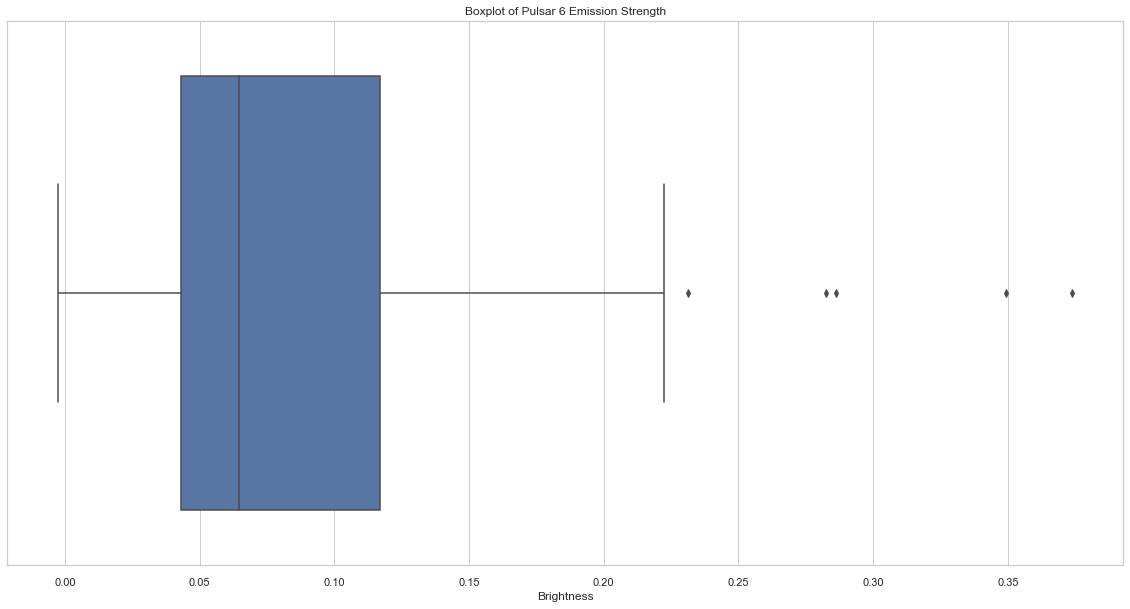

In [103]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame1["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


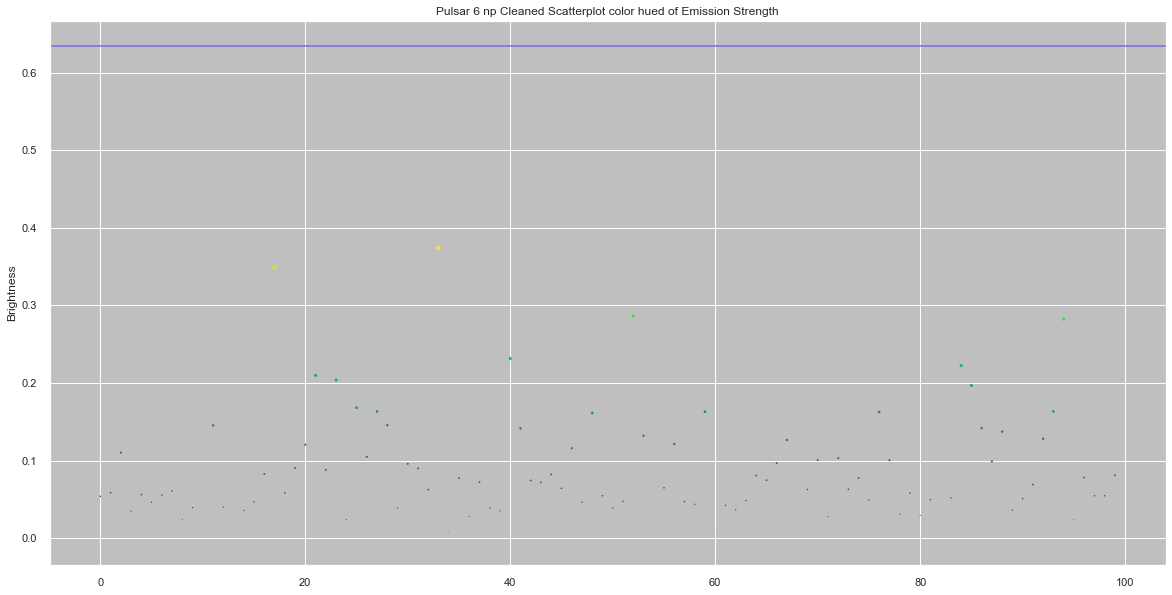

In [104]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame1.Brightness.values
ax = sns.scatterplot(data=frame1["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.63457545, ls='-',c='mediumslateblue')

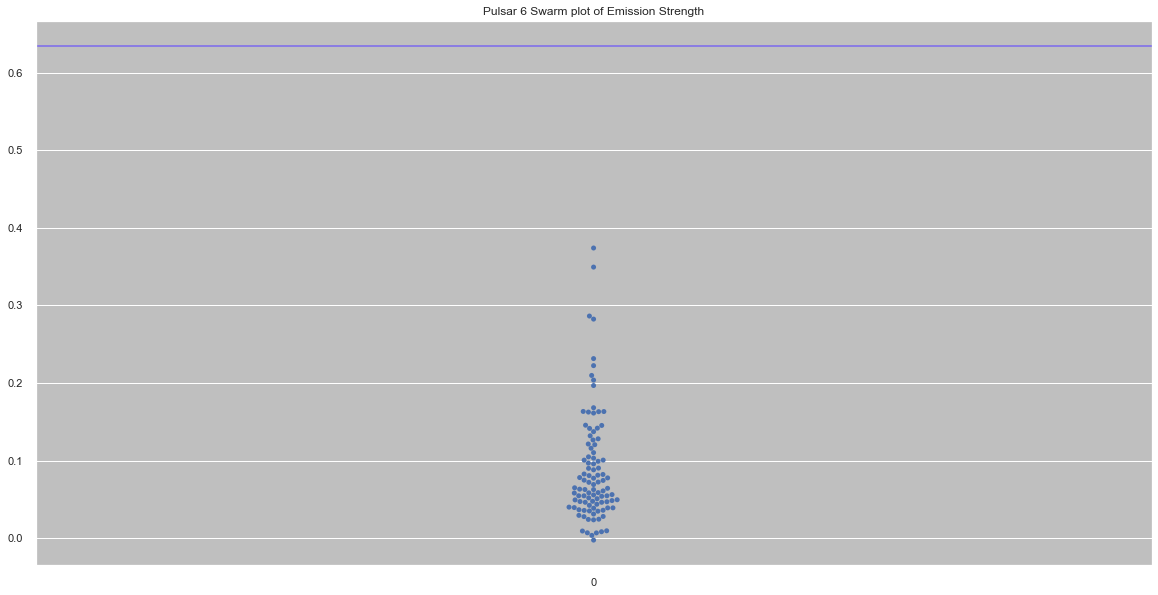

In [105]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame1.Brightness.values
ax = plt.axhline( y=0.63457545, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=frame1["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [106]:
print(frame2)

storeover1 = len(frame2[(frame2.Brightness > frame2["Brightness"].median())])
storeunder1 = len(frame2[(frame2.Brightness < frame2["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
100           101    0.016951     0.004670       0
101           102    0.033825     0.004631       0
102           103    0.016597     0.004472       0
103           104    0.228138     0.006859       0
104           105    0.161181     0.005432       0
..            ...         ...          ...     ...
195           196    0.337917     0.005610       0
196           197    0.825366     0.009585       1
197           198    0.205187     0.005120       0
198           199    0.165550     0.006728       0
199           200    0.074774     0.004719       0

[100 rows x 4 columns]


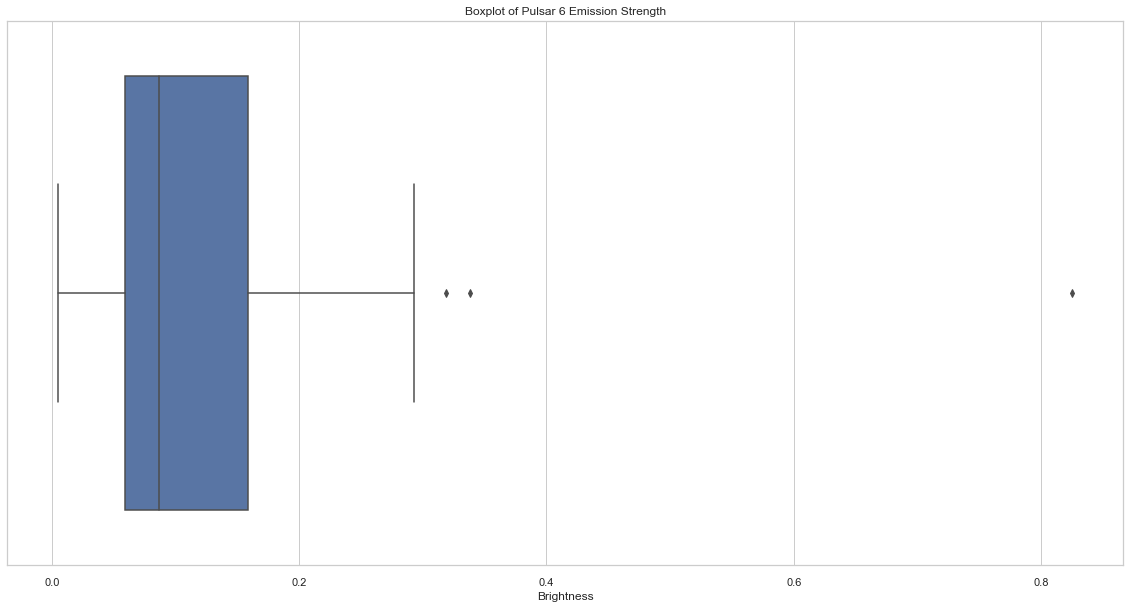

In [107]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame2["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

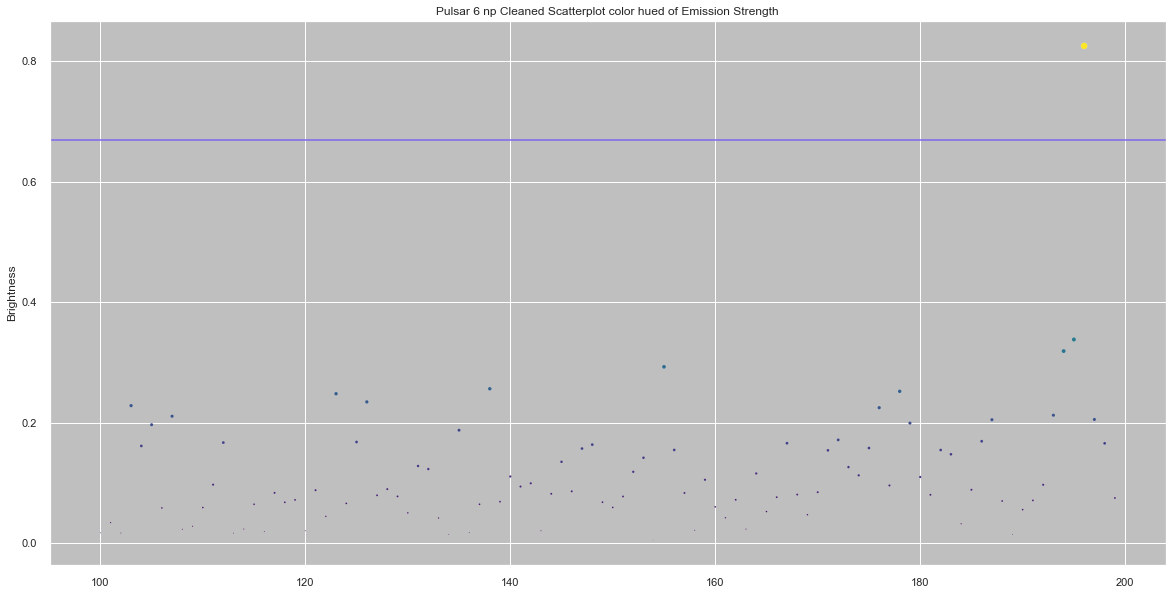

In [108]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame2.Brightness.values
ax = sns.scatterplot(data=frame2["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6688056, ls='-',c='mediumslateblue')

In [109]:
print(frame3)

storeover1 = len(frame3[(frame3.Brightness > frame3["Brightness"].median())])
storeunder1 = len(frame3[(frame3.Brightness < frame3["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
200           201    0.173739     0.005570       0
201           202    0.037748     0.004669       0
202           203    0.016790     0.004630       0
203           204    0.034866     0.004671       0
204           205    0.051363     0.004964       0
..            ...         ...          ...     ...
295           296    0.210592     0.008378       0
296           297    0.236811     0.005368       0
297           298    0.247450     0.005141       0
298           299    0.218870     0.005492       0
299           300    0.094358     0.005185       0

[100 rows x 4 columns]


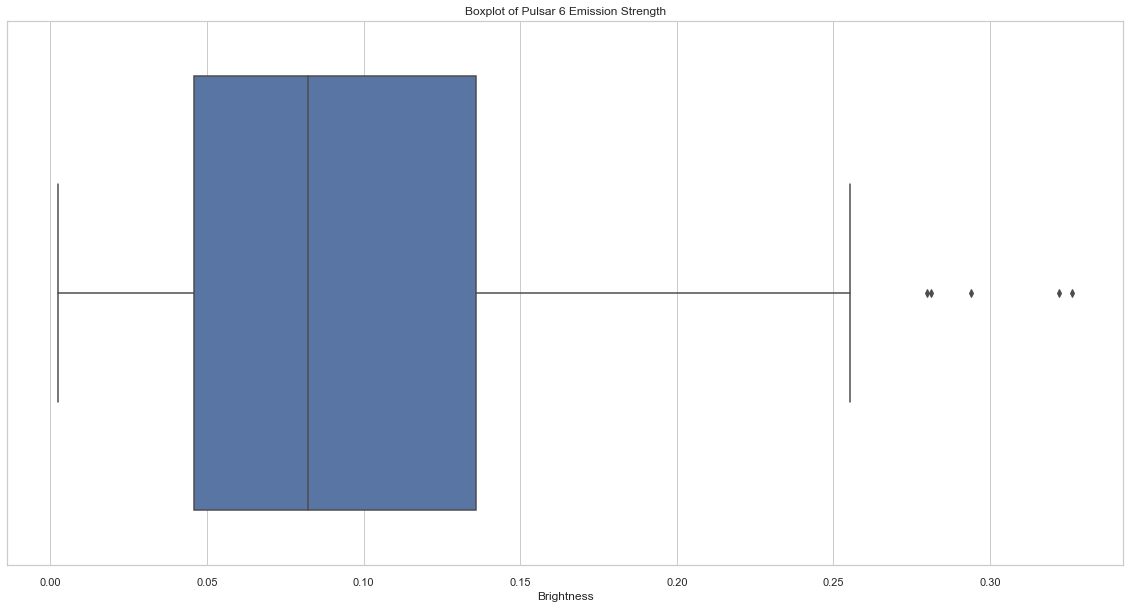

In [110]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame3["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

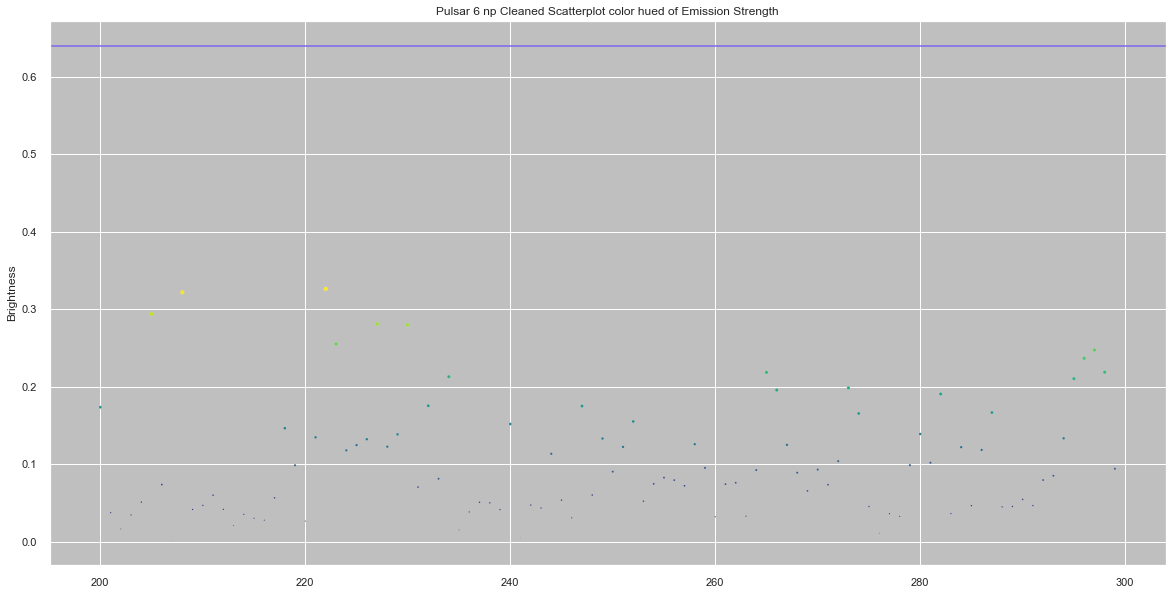

In [111]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame3.Brightness.values
ax = sns.scatterplot(data=frame3["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.63955675, ls='-',c='mediumslateblue')

In [112]:
print(frame4)

storeover1 = len(frame4[(frame4.Brightness > frame4["Brightness"].median())])
storeunder1 = len(frame4[(frame4.Brightness < frame4["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
300           301    0.070037     0.004785       0
301           302    0.056514     0.004865       0
302           303    0.109227     0.005499       0
303           304    0.017203     0.004607       0
304           305    0.080931     0.004913       0
..            ...         ...          ...     ...
395           396    0.163992     0.005245       0
396           397    0.069317     0.004684       0
397           398    0.192664     0.006641       0
398           399    0.059285     0.005177       0
399           400    0.122876     0.004944       0

[100 rows x 4 columns]


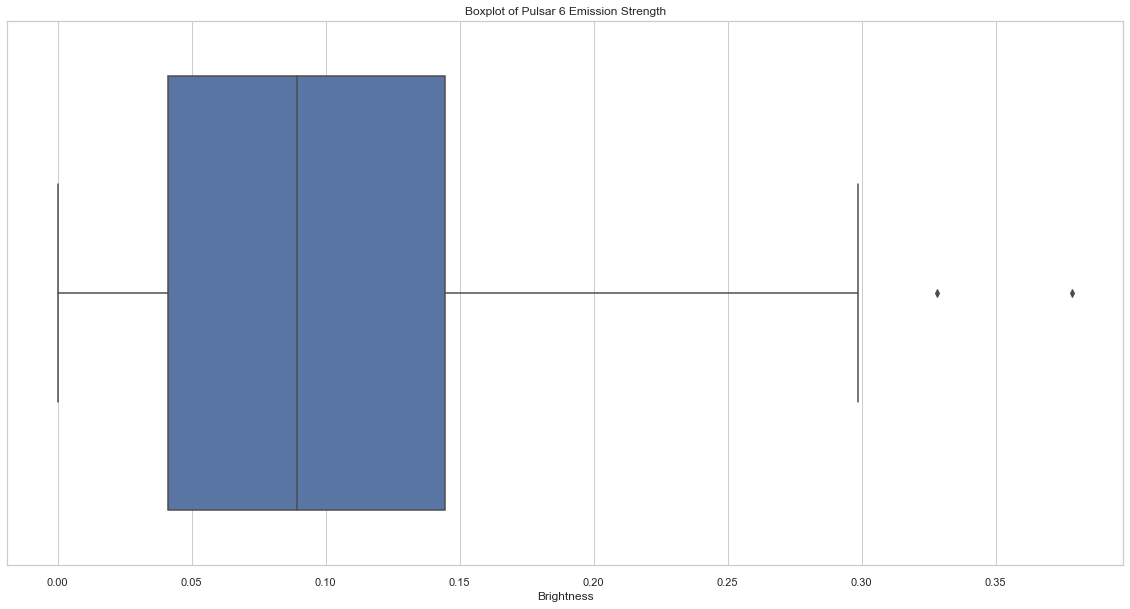

In [113]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame4["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

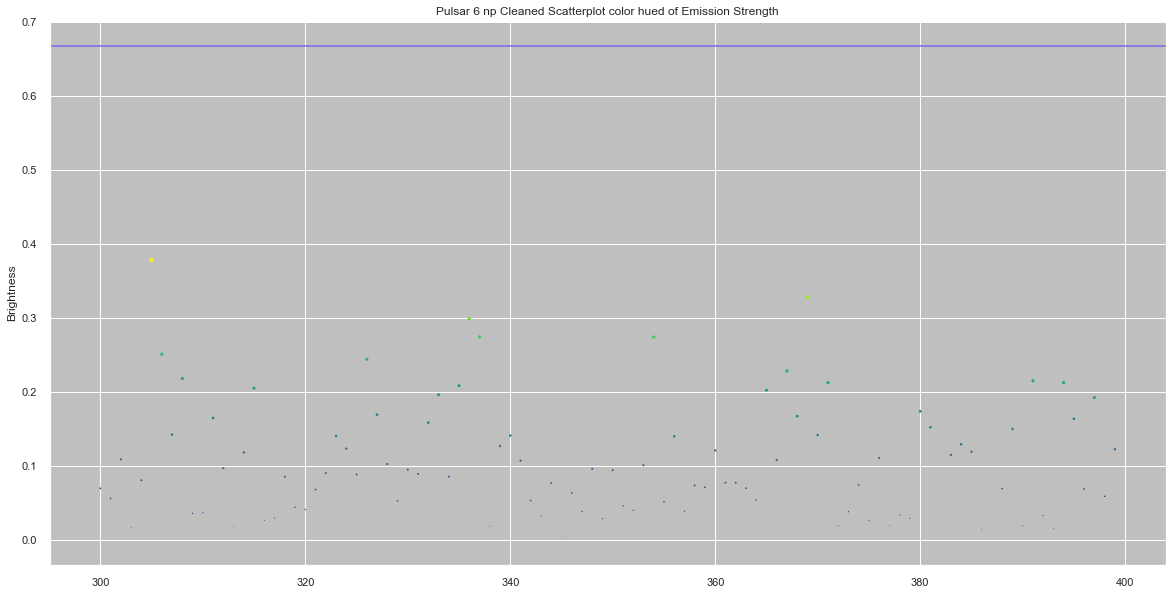

In [114]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame4.Brightness.values
ax = sns.scatterplot(data=frame4["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.66777675, ls='-',c='mediumslateblue')

In [115]:
print(frame5)

storeover1 = len(frame5[(frame5.Brightness > frame5["Brightness"].median())])
storeunder1 = len(frame5[(frame5.Brightness < frame5["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
400           401    0.037546     0.004480       0
401           402    0.051041     0.004735       0
402           403    0.142469     0.005883       0
403           404    0.188700     0.005884       0
404           405    0.096702     0.005476       0
..            ...         ...          ...     ...
495           496    0.189197     0.007185       0
496           497    0.301715     0.007377       0
497           498    0.385347     0.007564       0
498           499    0.432230     0.013308       0
499           500    0.059575     0.004886       0

[100 rows x 4 columns]


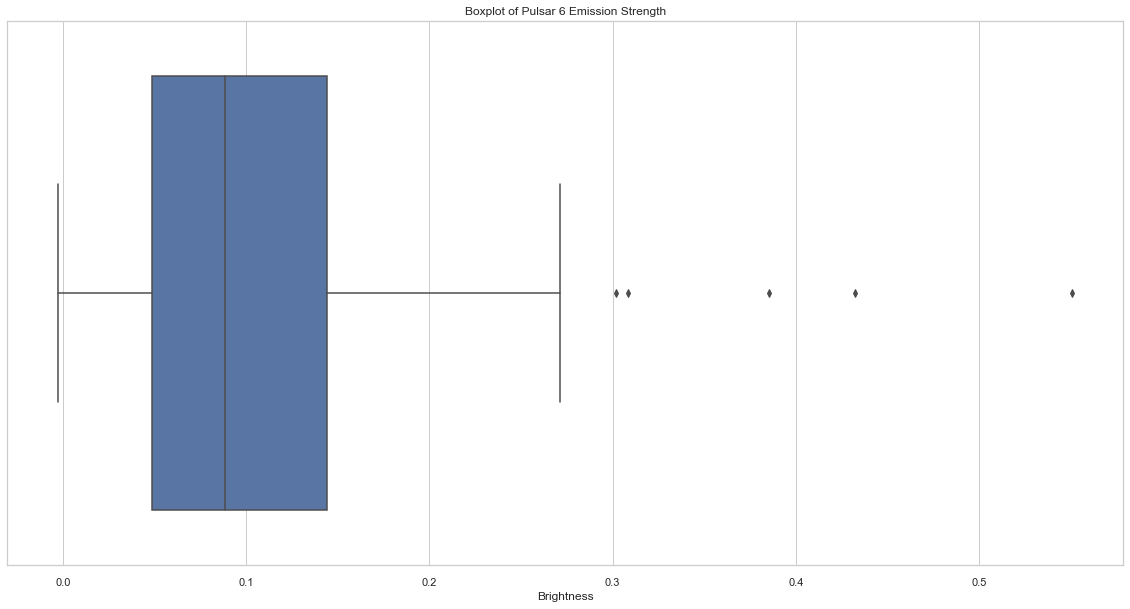

In [116]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame5["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


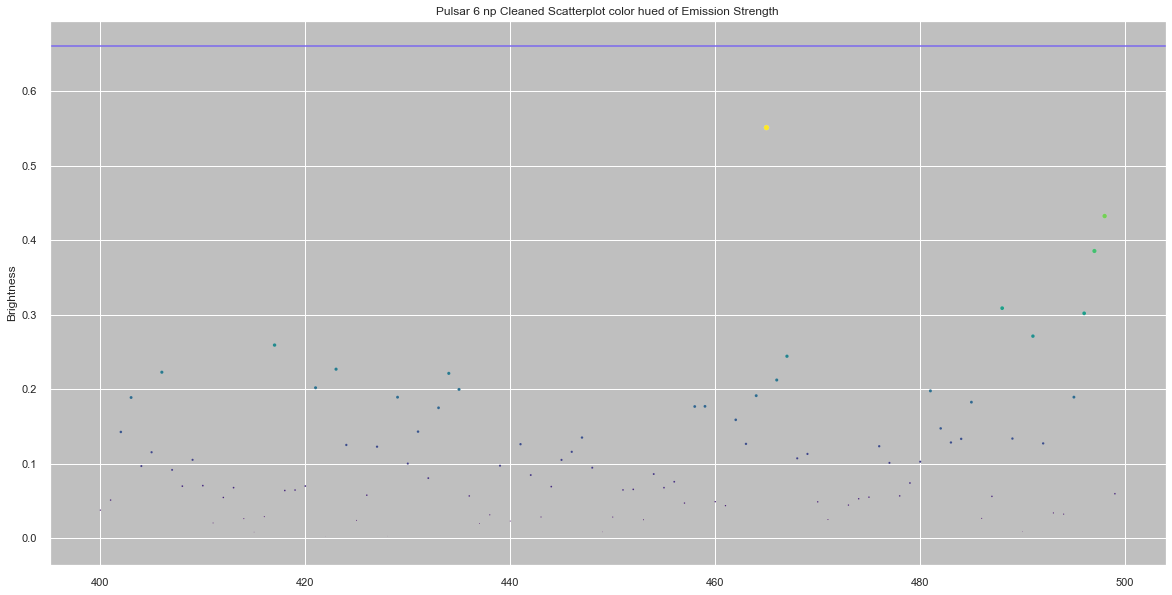

In [117]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame5.Brightness.values
ax = sns.scatterplot(data=frame5["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6605900499999999, ls='-',c='mediumslateblue')

In [118]:
print(frame6)

storeover1 = len(frame6[(frame6.Brightness > frame6["Brightness"].median())])
storeunder1 = len(frame6[(frame6.Brightness < frame6["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
500           501    0.023690     0.004641       0
501           502    0.001822     0.004722       0
502           503    0.035485     0.004825       0
503           504    0.022599     0.004928       0
504           505    0.105347     0.004793       0
..            ...         ...          ...     ...
595           596    0.061523     0.004826       0
596           597    0.169447     0.005384       0
597           598    0.091820     0.004778       0
598           599    0.090998     0.005246       0
599           600    0.031500     0.004759       0

[100 rows x 4 columns]


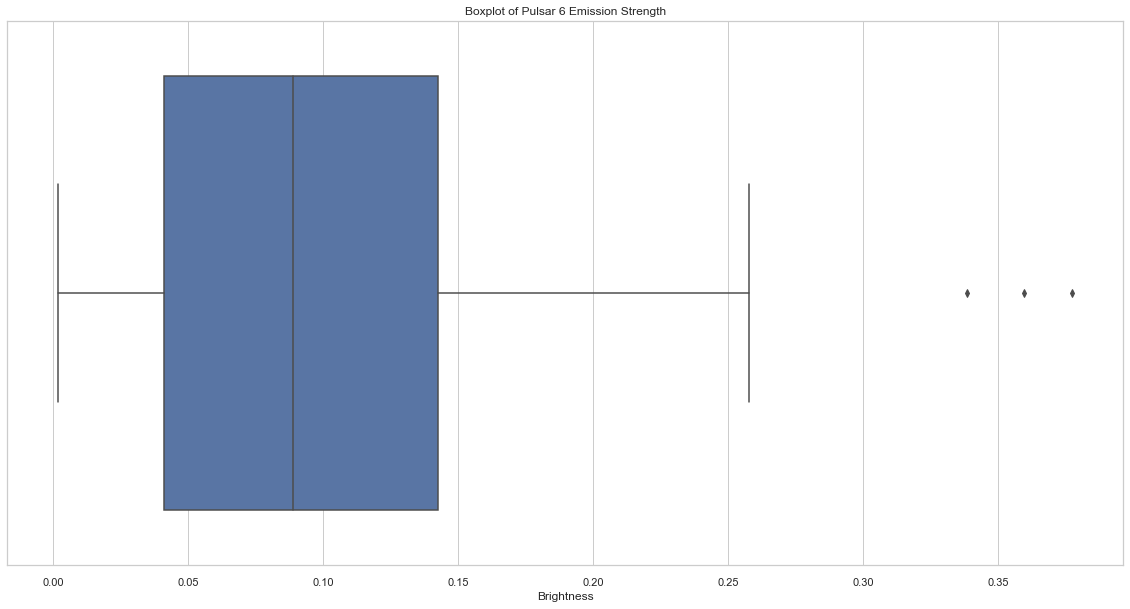

In [119]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

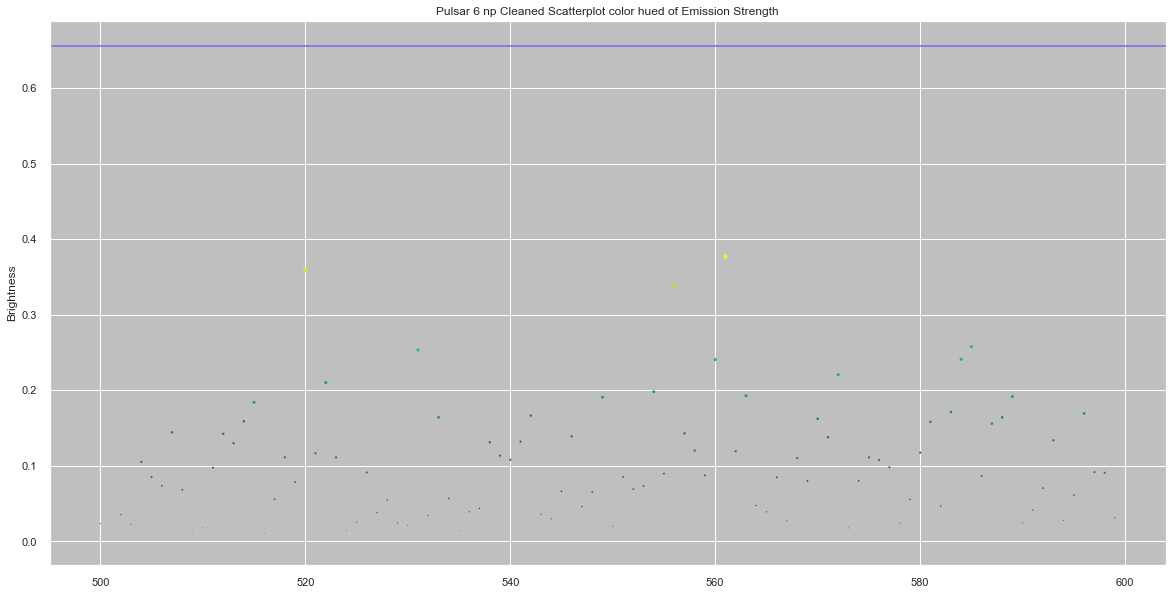

In [120]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame6.Brightness.values
ax = sns.scatterplot(data=frame6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.65585835, ls='-',c='mediumslateblue')

In [121]:
print(frame7)

storeover1 = len(frame7[(frame7.Brightness > frame7["Brightness"].median())])
storeunder1 = len(frame7[(frame7.Brightness < frame7["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
600           601    0.157963     0.005844       0
601           602    0.051092     0.004694       0
602           603    0.084850     0.004786       0
603           604    0.093293     0.005116       0
604           605    0.046204     0.004849       0
..            ...         ...          ...     ...
695           696    0.134760     0.005456       0
696           697    0.058745     0.004339       0
697           698    0.123274     0.005768       0
698           699    0.253593     0.009937       0
699           700    0.059699     0.004912       0

[100 rows x 4 columns]


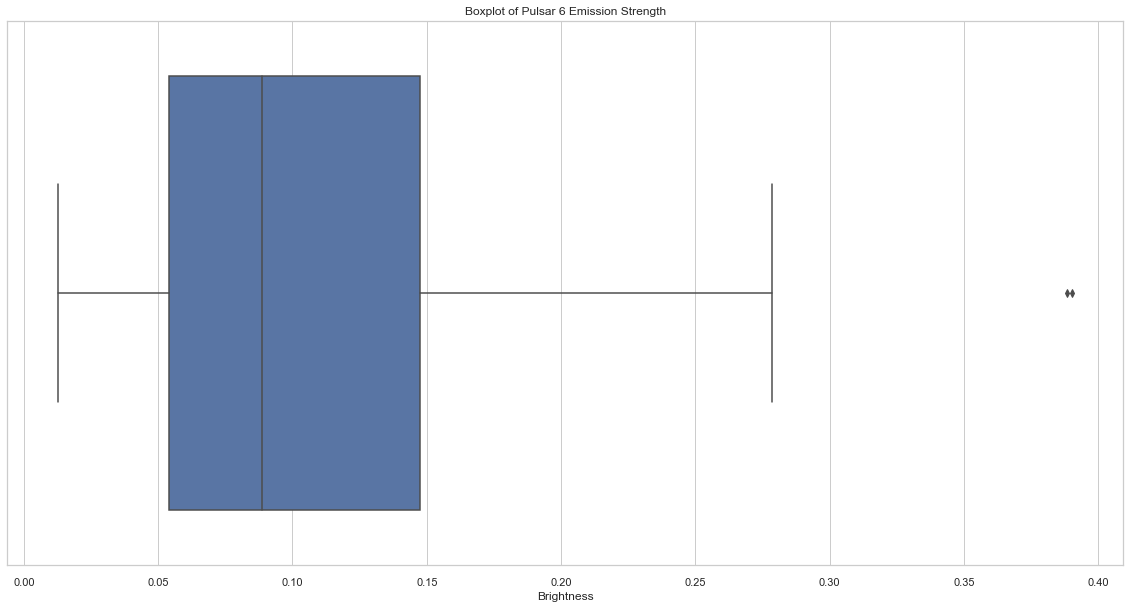

In [122]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame7["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

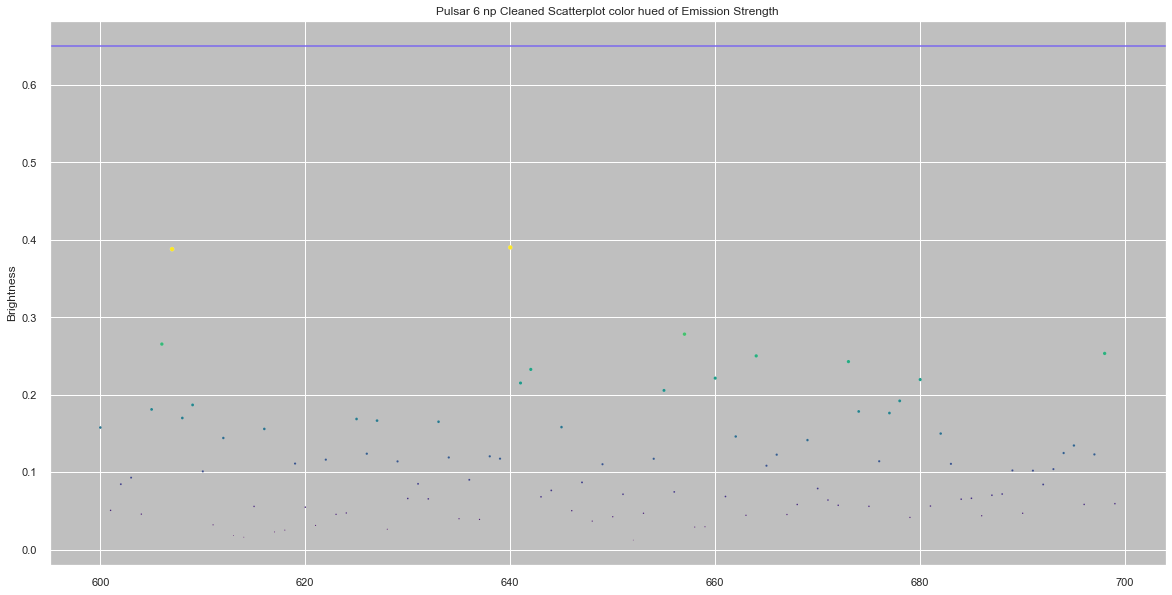

In [123]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame7.Brightness.values
ax = sns.scatterplot(data=frame7["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6504474499999999, ls='-',c='mediumslateblue')

In [124]:
framebinary
#this didn't go to plan.

[0, 0, 0, 0, 0, 0, 0]

#### Randomness testing

In [125]:
np.savetxt(r'framebinarypulsar5.txt', framebinary, fmt='%d', delimiter='')
np.savetxt(r'every5thbinarypulsar5.txt', held5ths.Binary, fmt='%d', delimiter='')
np.savetxt(r'allpulsar5.txt', pulsar6.Binary, fmt='%d', delimiter='')
np.savetxt(r'npcleanedpulsar5.txt', pulsar6npcleaned.Binary, fmt='%d', delimiter='')